# Boston 인근지역 주택가격 조사

당신은 글로벌 부동산 컨설팅 회사의 데이터 분석가로 입사했습니다. 첫 번째 프로젝트로 보스턴 지역 주택 가격 데이터셋(boston)을 분석하여 부동산 시장의 전반적인 특성을 파악하고, 투자자들을 위한 기초 분석 보고서를 작성해야 합니다.


회사의 투자자문팀에서는 다음과 같은 질문들에 대한 답변을 요구하고 있습니다:

- 보스턴 지역 주택들의 전반적인 가격 수준은 어떠한가? 
- 주택 가격에 영향을 미치는 주요 요인들의 분포는 어떠한가?
- 데이터의 품질은 투자 분석에 적합한 수준인가?

In [96]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from pandas import pivot_table
from pandas import DataFrame
from pandas import melt
import numpy as np

In [80]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 12          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

## Mission 1: 데이터 기본 정보 분석

### 1-1. 데이터셋의 크기(행렬) 및 데이터 타입 확인

In [ ]:
# 크기 확인
origin = load_data('boston')
origin.shape

#print(f"데이터셋 크기: {origin.shape}")
#print(f"행 개수: {origin.shape[0]}개")
#print(f"열 개수: {origin.shape[1]}개")

#print("\n 데이터 타입 정보:")
#print(origin.info())

#origin.head()

[data] https://data.hossam.kr/data/kaggle/boston.xlsx
[desc] 보스턴 인근 지역의 인구·환경·교육·범죄·세금 정보 등을 기반으로 주택의 중위가격(MEDV)을 예측하기 위해 수집된 대표적인 회귀 분석용 주택시장 데이터 (출처: https://www.kaggle.com/datasets/altavish/boston-housing-dataset)

field    description
-------  ---------------------------------------------------------------------------------------
CRIM     타운별 1인당 범죄율 (Per capita crime rate by town)
ZN       25,000 sqft 이상 주거용 대지 비율 (Proportion of residential land zoned for large lots)
INDUS    비소매 상업구역 비율 (Proportion of non-retail business acres per town)
CHAS     찰스강 인접 여부 (Charles River dummy variable: 1 if tract bounds river; 0 otherwise)
NOX      대기 오염 정도 (Nitric oxides concentration, parts per 10 million)
RM       주택당 평균 방(Room) 수 (Average number of rooms per dwelling)
AGE      1940년 이전 건축 비율 (Proportion of owner-occupied units built prior to 1940)
DIS      5개 주요 고용센터까지의 거리 (Weighted distances to five Boston employment centers)
RAD      고속도로 접근성 지수 (Index of accessibility to radial highways)
T

(506, 14)

In [82]:
# 데이터 타입 확인
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 1-2. 범주형 변수 (CHAS)의 데이터 타입 변환:

In [94]:
df = origin.astype({'CHAS': 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    int64   
 9   TAX      506 non-null    int64   
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(1), float64(11), int64(2)
memory usage: 52.1 KB


### 1-3. 결측치 현황 확인 및 데이터 완성도 평가

###### 완성도 평가: 결측치가 몇% 있냐 찾는 것

In [84]:
origin.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

###### -> 결측치: 0 % -> 완성도가 100 %

## Mission 2: 수치형 변수 기초통계량 분석

### 2-1. 주택가격 (MEDV)과 주요 특성 변수들 (CRIM, RM, LSTAT, NOX)에 대한 기술통계 확인:

-  **전치 형태가 파워포인트에 넣기에 이쁜 형태임:**

In [87]:
df[['CRIM', 'NOX', 'RM', 'LSTAT', 'MEDV']].describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
LSTAT,506.0,12.653063,7.141062,1.73000,6.950000,11.36000,16.955000,37.9700
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000


In [97]:
result = []

for f in ['CRIM', 'NOX', 'RM', 'LSTAT', 'MEDV']:
    mean_val = df[f].mean()
    median_val = df[f].median()

    if mean_val > median_val:
        skew_type = 'right_skewed'
    elif mean_val < median_val:
        skew_type = 'left_skewed'
    else:
        skew_type = 'symmetric'
    
    result.append(
        {
            'field': f,
            'mean': mean_val,
            'median': median_val,
            'skew': skew_type
        }
    )

DataFrame(result)

,field,mean,median,skew
0,CRIM,3.613524,0.25651,right_skewed
1,NOX,0.554695,0.53800,right_skewed
2,RM,6.284634,6.20850,right_skewed
3,LSTAT,12.653063,11.36000,right_skewed
4,MEDV,22.532806,21.20000,right_skewed


> 모든 데이터가 우편향 분포임을 확인

-  **변수끼리 mean이나 중앙값 비교하면 값 차이가 많이 남 -> scaling 의심해보기!**

**기술통계량을 통해 확인해야 하는 항목들:**
1. 평균과 중앙값의 차이를 통한 데이터 분포형태 파악:
   - 우편향(right-skewed): 평균 > 중앙값
   - 좌편향(left-skewed): 평균 < 중앙값
   - 우편향(symmetric): 평균 = 중앙값 
   - but! 이 방법은 평균과 중앙값이 완전히 일치할 경우만 대칭으로 판단하기 떄문에 매우 극단적임
     - -> 추론통계에서 공부하게 될 `신뢰수준`의 개념이 추가 도입되어야 함
     - 사분위수 구간을 활용할 수도 있으나, 같은 내용이므로 평균 vs. 중앙값만 비교해도 충분함
2. 최소, 최대값 -> 데이터 구간 파악 -> 각 변수 간 구간 차이가 큰지 여부도 확인하기
   - if 각 변수 간 구간 차 크면: 추론 통계 때 scaling 또는 로그변환 등의 적용을 고려해봐야 됨
   - if 값을 통한 비교 어려우면: boxplot, histplot, kdeplot 등을 통해 비교 가능

### 2-2 각 변수의 분포형태 분석, 중심경향성과 산포도 해석하기:

- 수치형 데이터의 중심경향성:
  - mean vs. median: 수치형 데이터의 주요 특성 변수들(CRIM, NOX, RM, LSTAT) 모두에서 데이터가 우편향(right-skewed) 되있음이 보인다.
- 수치형 데이터의 산포도:
  - std: 특성변수 CRIM, LSTAT에서 큰 표준편차(≒ 8.60, 7.14) 값을 보여주었고 특성변수 NOX, RM에서 낮은 표준편차(≒ 0.12, 0.70)값을 보여준다.
    - -> 특성변수 CRIM, LSTAT에서는 데이터의 편차가 큰 편이고 특성변수 NOX, RM의 데이터는 고르게 분포하는 경향이 있음을 시사한다.
  - IQR: 
    - IQR < 1: 특성변수(NOX: 0.18) < 특성변수(RM: 0.738)
    - IQR > 1:: 특성변수(CRIM: 3.60) < 특성변수(LSTAT:10.01)

### 2-3. 박스플롯 그려서 이상치 존재여부 확인하기:

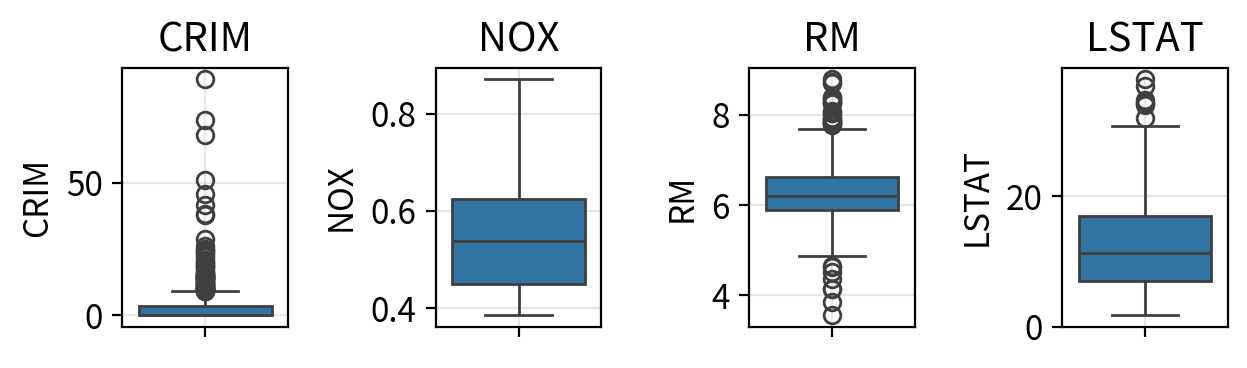

In [98]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 400             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 4                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기 + 꾸미기:
for i, col in enumerate(['CRIM', 'NOX', 'RM', 'LSTAT']):
    data = df[df[col] > 0][col]
    # 강사님 코드:

    sb.boxplot(data, ax = ax[i], orient = 'v')
    ax[i].set_title(col)
    ax[i].grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()          # 여백 제거
plt.show()                  # 그래프 화면 출력
plt.close()                 # 그래프 작업 종료

-  -> 이상치 존재 확인: CRIM, RM, LSTAT, MEDV
> - 이상치에 대한 처리는 분석가의 주관이 반영될 수 있기 떄문에 이상치를 처리할 것인지, 그대로 둘 것인지는 분석가의 판단에 따른다.
>
> - -> 만약, 이상치를 그대로 둔다면, 이상치에 민감한 분석 기법들이 많기 떄문에 스케일링, 로그변환 등으로 이상치에 대한 민감성을 축소시켜야 된다.
>   - 이때 하는 `스케일링` 또는 `로그변환`은 이상치 민감성을 축소시킬 지 모르는 상태에서 `일단 확인`해보려는 목적이 크다.

## Mission 3: 분포 정규성 확인

### 3-1. 주택가격(MEDV)의 히스토그램 그리고 분포 형태 분석하기:

22.532806324110677
21.2


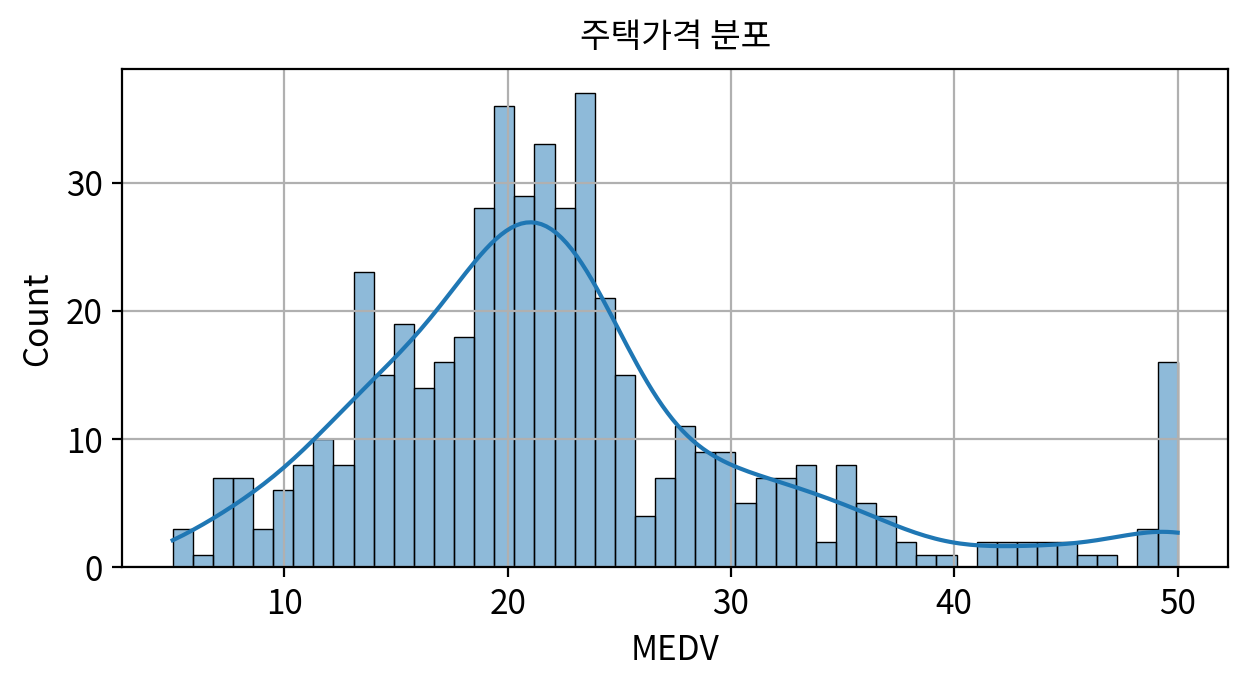

In [93]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) Histogram 그리기: seaborn 사용
sb.histplot(data = df, x = 'MEDV', bins = 50,
            linewidth = 0.5, kde=True)

print(df['MEDV'].mean())
print(df['MEDV'].median())

# 3) 그래프 꾸미기: 
ax.set_title("주택가격 분포", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력                              
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

**인사이트:**
- 분포: 
  - 오른쪽 꼬리가 긴 형태 (high-value outlier 또는 asymmetric)
  - 오른쪽으로 치우친 형태 (right-skewed)
    - 평균(22.53) > 중앙값 (21.2)
  - peak(최빈값: 20 전후)과 대다수의 값 둘다 15~25 사이에 위치해 있다. 
    - peak from KDE plot indicates 최빈값 in the range. 
  - 고가지역 (MEDV ≥ 30) 및 저가 지역 (MEDV ≤ 10)은 소수다
- 결론: 분포 전체는 한쪽으로 꼬리가 길고, 중심부의 밀도가 뚜렷하며, 극단값(outliers)이 존재하는 전형적인 부동산 가격 패턴.

### 3-2. 심하게 치우친 변수들 (CRIM, RM, LSTAT)에 대한 로그변환 적용 및 변환 전후의 분포 비교분석하기:

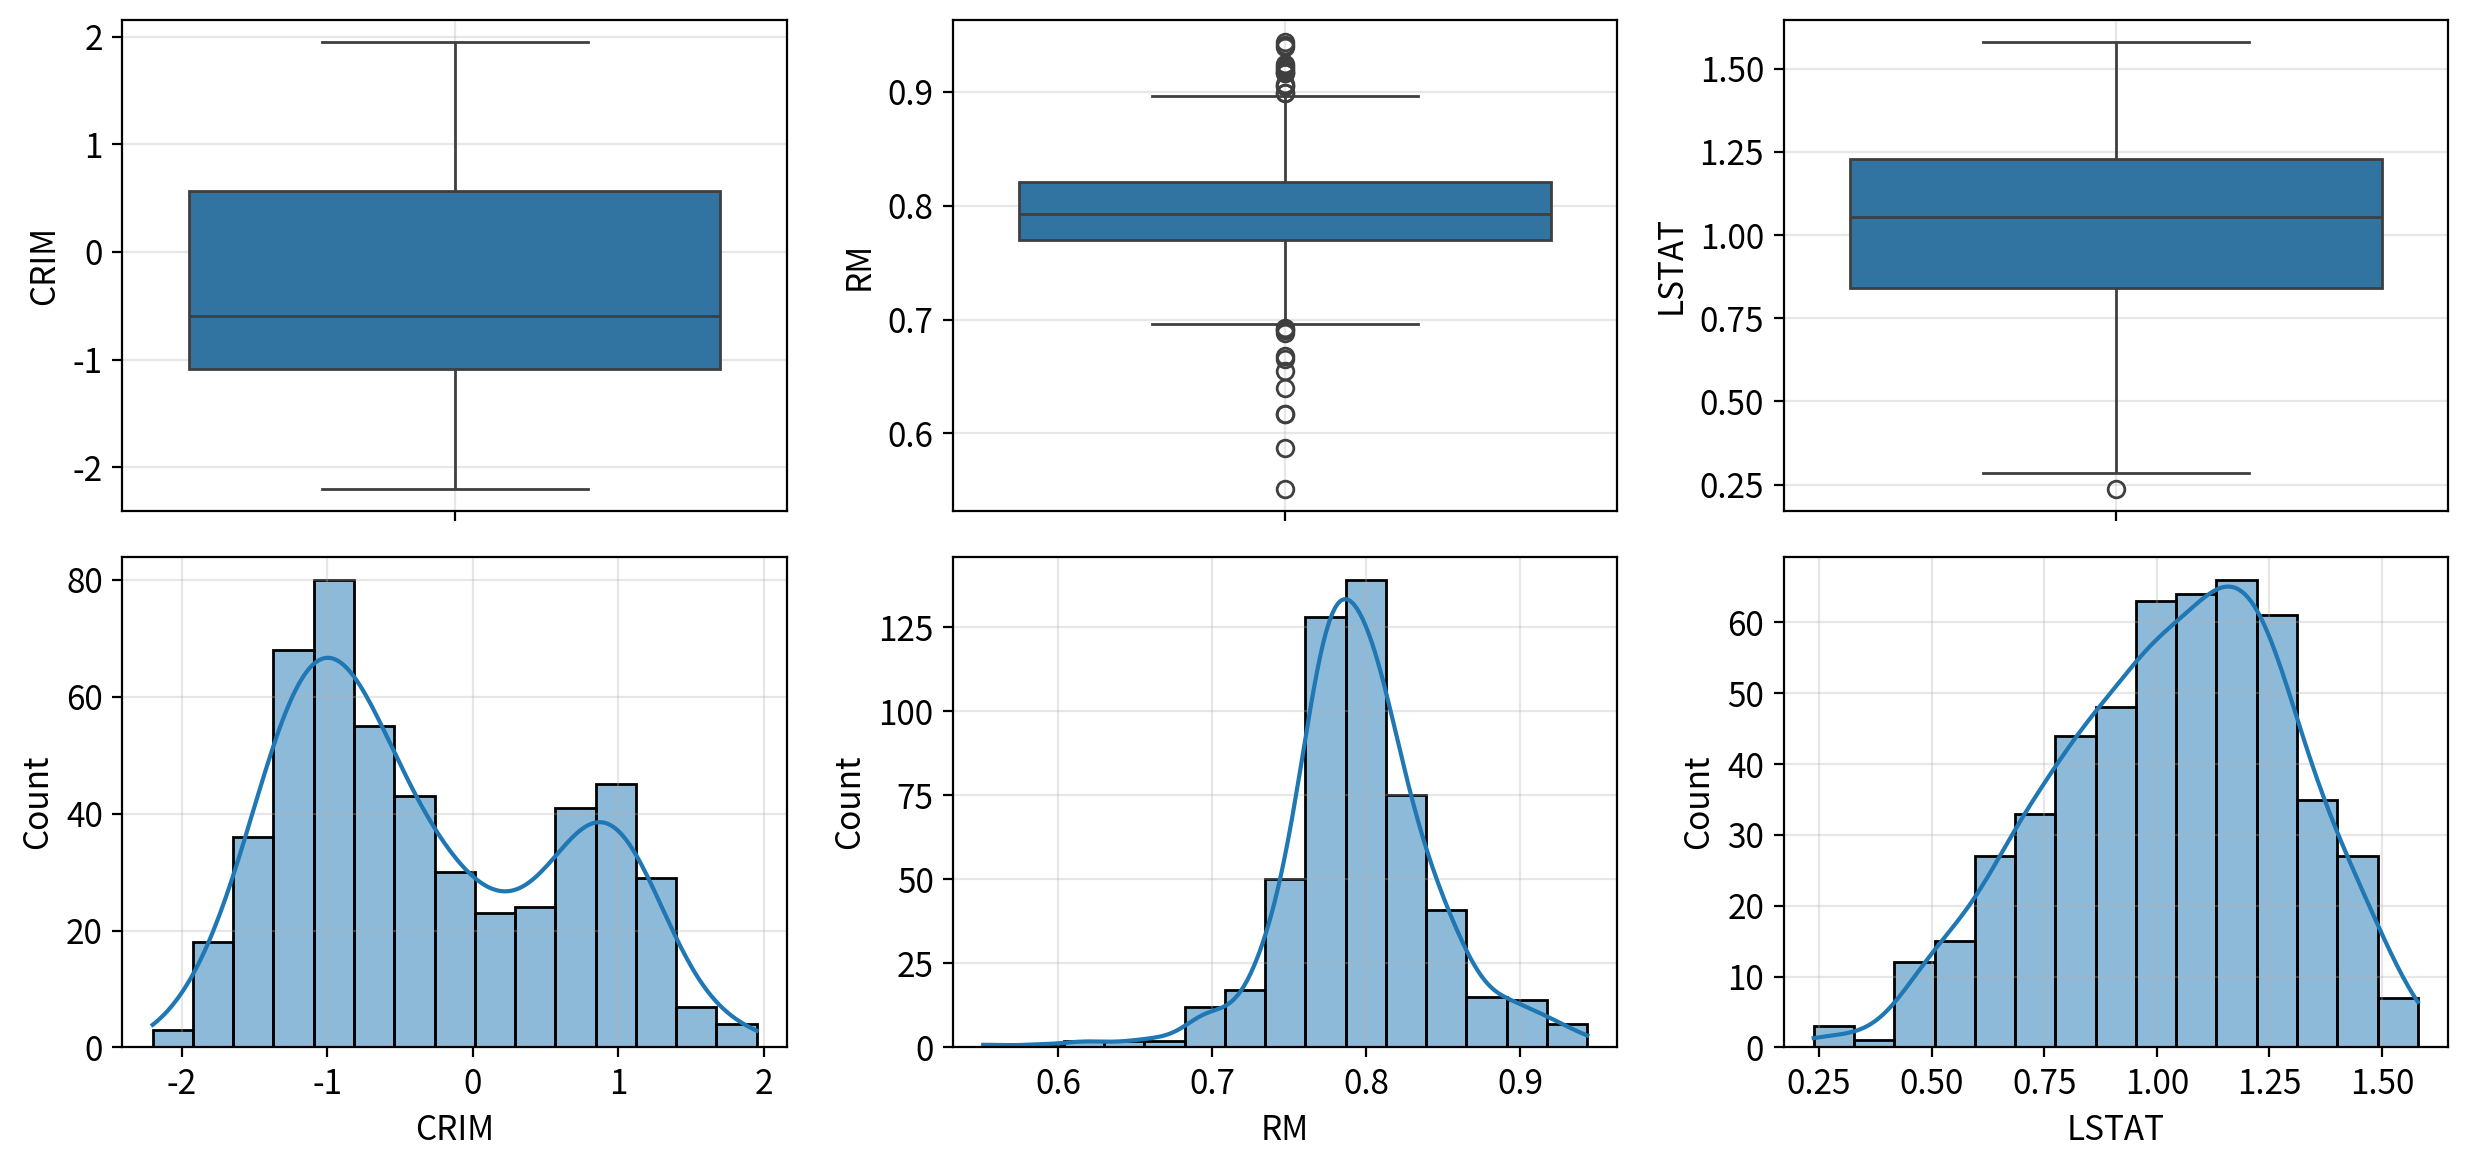

In [62]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 2500             # 그래프 가로 크기
height_px = 1200             # 그래프 세로 크기
rows = 2                    # 그래프 행 수
cols = 3                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) boxplot 그래프 그리기 + 꾸미기:
for i, col in enumerate(['CRIM', 'RM', 'LSTAT']):
    
    data = df[df[col] > 0][col]
    log_data = np.log10(data)

    sb.boxplot(log_data, ax = ax[0][i], orient = 'v')
    ax[0][i].grid(True, alpha=0.3)

    sb.histplot(log_data, ax = ax[1][i], bins=15, kde=True)
    ax[1][i].grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

- 로그변환 후 
  - RM에서는 분포 개형은 어느정도 정규분포화 되었으나, 여전히 이상치가 많음이 확인됨 -> 정규분포로 보기 어려움
  - LSTAT은 여전히 우편향 분포를 보여줌 -> 정규분포와 거리가 멀다
  - CRIM에서는 peak가 두개로 관측됨 -> 다른 변수와의 다중공선성여부 탐색이 필요함

**아래는 강사님이 분석한 방법: ↓**

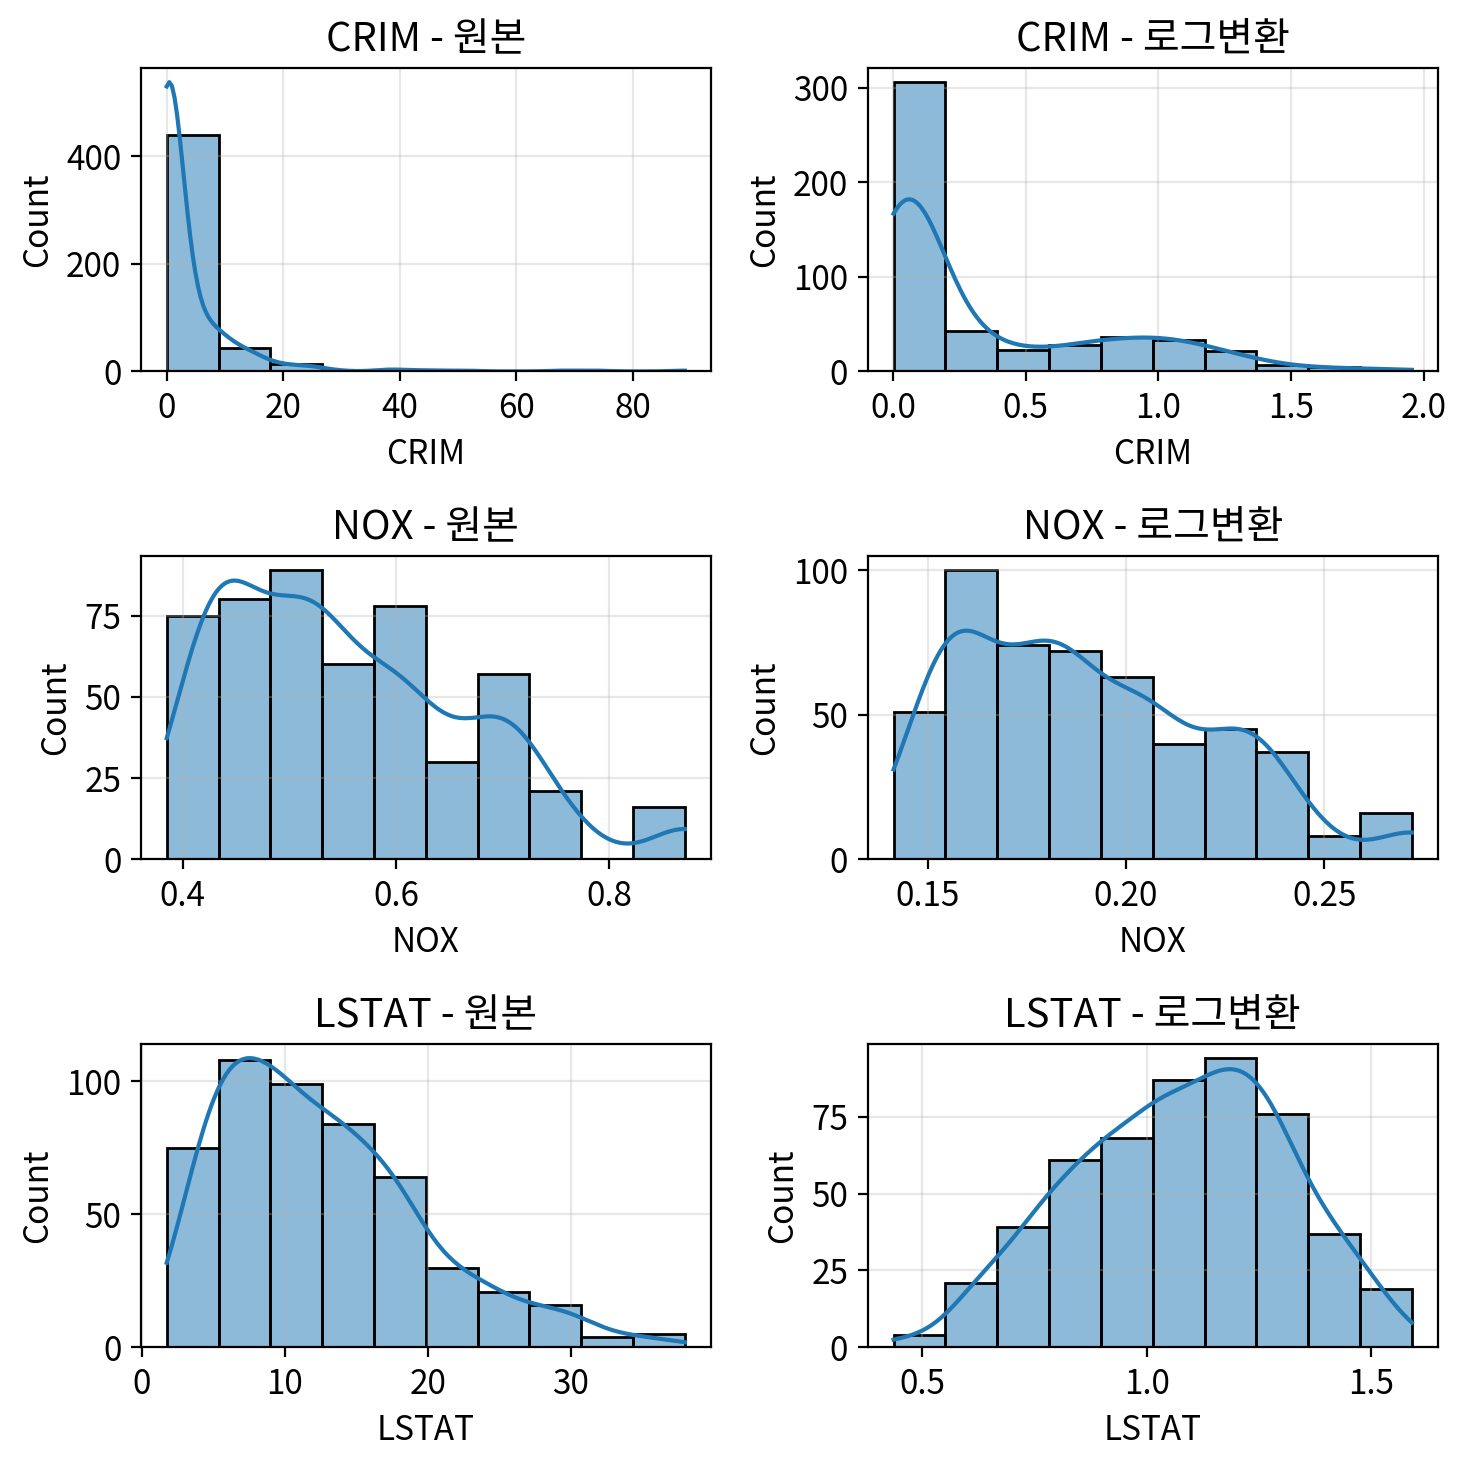

In [100]:
skewed_vars = ['CRIM', 'NOX', 'LSTAT']

# 1) 그래프 초기화
width_px = 1500                 # 그래프 가로 크기
height_px = 1500                # 그래프 세로 크기
rows = len(skewed_vars)         # 그래프 행 수
cols = 2                        # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)

# ax 객체가 행,열 수에 따라서 리스트가 된다.
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기
for i, v in enumerate(skewed_vars):
    # 원본에 대한 분포 확인
    sb.histplot(data=df, x=v, bins=10, kde=True, ax=ax[i][0])
    ax[i][0].set_title(f'{v} - 원본')
    ax[i][0].grid(alpha=0.3)

    # log변환 후의 분포 확인
    log_data = np.log10(df[v] + 1)
    sb.histplot(data=log_data, bins=10, kde=True, ax=ax[i][1])
    ax[i][1].set_title(f'{v} - 로그변환')
    ax[i][1].grid(alpha=0.3)

# 3) 그래프 꾸미기
fig.subplots_adjust(wspace=0.2, hspace=0.2)

# 4) 출력
plt.tight_layout() # 여백 제거
plt.show() # 그래프 화면 출력
plt.close() # 그래프 작업 종료

## Mission 4: 범주형 변수 분석

### 4-1 찰스강변 여부(CHAS) 변수의 빈도분석 수행하기:

In [63]:
df_chas3.describe(include='category')

,CHAS
count,506
unique,2
top,noBounds
freq,471


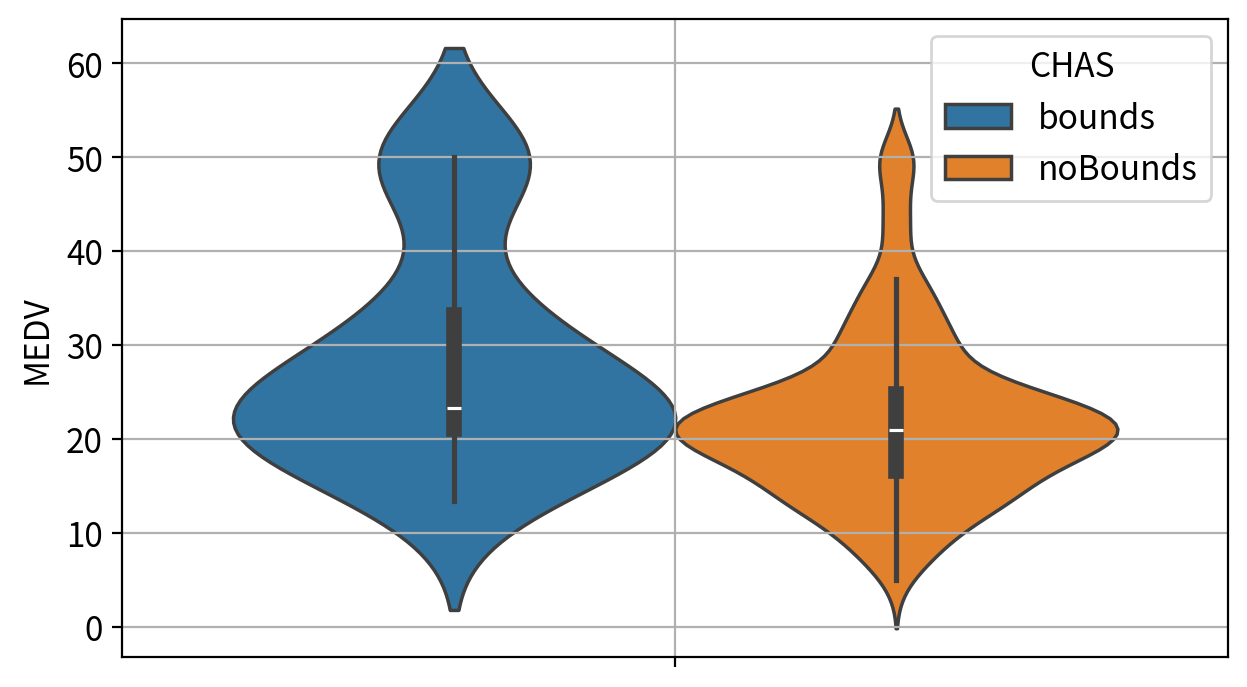

In [64]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) swarmplot 그래프 그리기: seaborn 사용
sb.violinplot(data = df_chas3, y = 'MEDV', hue = 'CHAS')

# 3) 그래프 꾸미기: 
#ax.set_title("✅", color = '✅', pad = 8, fontsize = 12)
#ax.set_xlabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_ylabel("✅", color = '✅', labelpad = 5, fontsize = 8)
#ax.set_xlim([✅, ✅])       # x축 범위
#ax.set_ylim([✅, ✅])       # y축 범위
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

- 강변(bounds)에 위치해있을수록 주택 가격(MEDV)이 높아짐을 알 수 있다.

### 4-2. 강변 위치에 따른 주탁가격 차이를 기초통계량으로 비교분석하기:

In [101]:
df.groupby('CHAS')['MEDV'].describe()

C:\Users\itwill\AppData\Local\Temp\ipykernel_804\4275711058.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('CHAS')['MEDV'].describe()


,count,mean,std,min,25%,50%,75%,max
CHAS,,,,,,,,
0,471.0,22.093843,8.831362,5.0,16.6,20.9,24.80,50.0
1,35.0,28.440000,11.816643,13.4,21.1,23.3,33.15,50.0


In [105]:
# 평균 가격 차이 계산
avg_price_non_river = df[df['CHAS'] == 0]['MEDV'].mean()
avg_price_river = df[df['CHAS'] == 1]['MEDV'].mean()
price_diff = avg_price_river - avg_price_non_river

print(f"\n가격 차이 분석:")
print(f"비강변 지역 평균 가격: ${avg_price_non_river:.2f}K")
print(f"강변 지역 평균 가격: ${avg_price_river:.2f}K")
print(f"가격 차이: ${price_diff:.2f}K ({
    price_diff/avg_price_non_river*100:.1f}% 높음)")


가격 차이 분석:
비강변 지역 평균 가격: $22.09K
강변 지역 평균 가격: $28.44K
가격 차이: $6.35K (28.7% 높음)


## Mission 5: 종합분석 보고서 작성
 
### **5-1. 종합평가**
- 완성도(Completeness): 결측값 현황
  - 결측치: 없음 (완성도 100%)
- 일관성(Consistency): 데이터 타입의 적합성
  - RAD와 TAX를 제외한 모든 수치형 변수들은 실수형(float64) 타입으로 일관성을 유지했다
  - CHAS는 강변 위치의 유무를 나타내는 변수로서, 정수형(int64) 타입에서 명목형(category) 변수로 타입 변환이 필요했다.
- 분포특성(Distribution): 정규성 및 이상값 현황
  - 조사했던 네 변수 모두에서 우편향 분포 확인
  - 로그변환 혹은 스케일링으로 정규성 개선 가능

### **5-2. 핵심 인사이트 3가지 이상:**

- **보스턴 지역 주택 시장의 전반적 특성**

- **데이터의 전반적 특성 언급**
  - 평균
  - 데이터 범위(최대값-최소값)
  - 중위값

- 데이터의 분포 특성 언급

**투자 시 주의해야 할 데이터상의 특징**
- 강변 주변이 평균 28.7% 더 높다.

**추가 분석이 필요한 영역**
- 흑인 비율, 부촌 여부, 교육, 교통 등 다른 변수들에 대해서도 같은 흐름으로 파악이 필요함

# 제주도 남녀 대학생 개인정보 관리방법

my

In [65]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from pandas import pivot_table
from pandas import melt
from pandas import crosstab
import numpy as np

In [66]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 12          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

In [67]:
origin = load_data('privacy')
origin.shape

[data] https://data.hossam.kr/data/lab09/privacy.xlsx
[desc] 제주도 남녀 대학생의 개인정보 관리방법에 관한 설문조사 결과 데이터 (출처: 사회조사분석사 2급 실기작업형 기출)
[!] Cannot read metadata


(30, 3)

In [68]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학생ID    30 non-null     int64 
 1   성별      30 non-null     object
 2   메모종류    30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


In [69]:
df = origin.astype({'성별': 'category', '메모종류': 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   학생ID    30 non-null     int64   
 1   성별      30 non-null     category
 2   메모종류    30 non-null     category
dtypes: category(2), int64(1)
memory usage: 688.0 bytes


In [70]:
df.head()

,학생ID,성별,메모종류
0,1,남,3
1,2,여,2
2,3,여,2
3,4,여,1
4,5,여,2


In [71]:
df.isna().sum()

학생ID    0
성별      0
메모종류    0
dtype: int64

In [72]:
df.describe(include='category')

,성별,메모종류
count,30,30
unique,2,3
top,여,2
freq,22,20


In [73]:
df2 = df.drop(columns = '학생ID')
# df2
for c in df2.columns:
    print("=====", c, "=====")
    print(df2[c].value_counts())

===== 성별 =====
성별
여    22
남     8
Name: count, dtype: int64
===== 메모종류 =====
메모종류
2    20
1     6
3     4
Name: count, dtype: int64


In [74]:
ct = crosstab(index = df2['성별'], columns = df2['메모종류'],
              normalize=True)
ct

메모종류,1,2,3
성별,,,
남,0.066667,0.133333,0.066667
여,0.133333,0.533333,0.066667


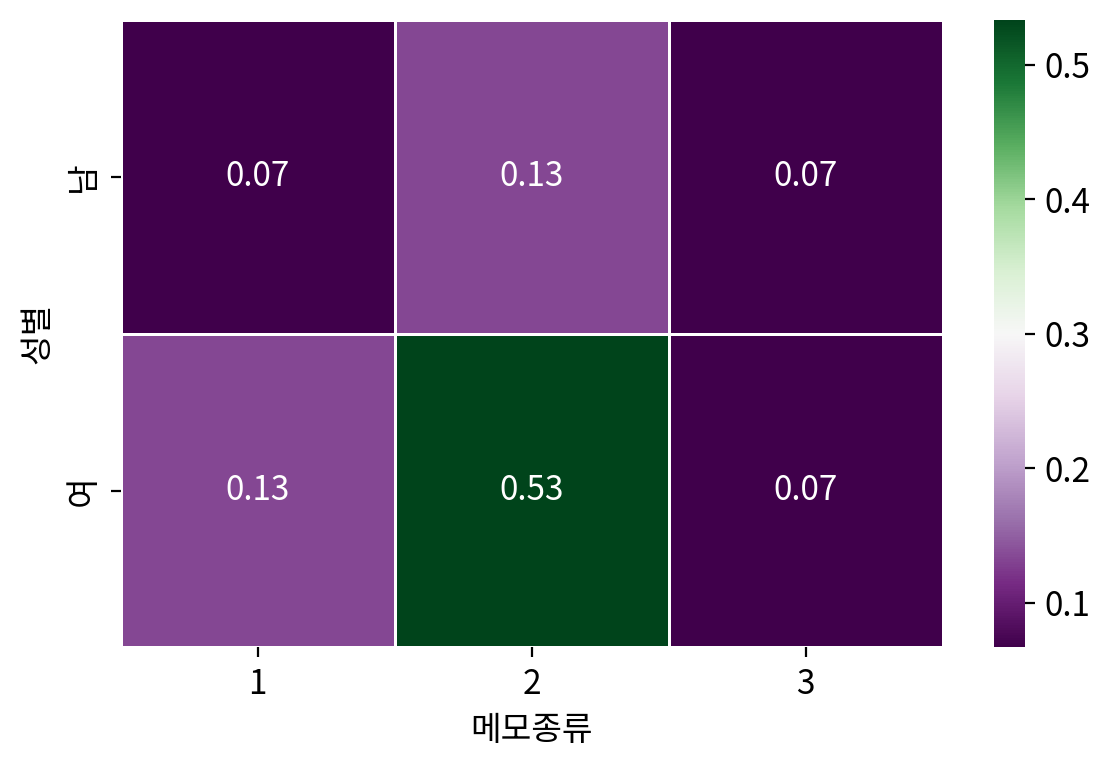

In [75]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1200             # 가로 = 세로 맞추기
height_px = 800            
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) Heatmap 그리기: seaborn 사용
sb.heatmap(data = ct, annot=True, fmt='0.2f', 
           linewidth = 0.5, cmap = "PRGn")
  # annot=True: 수치값을 함께 표시함
  # fmt: annot=True가 설정된 경우 표시되는 수치값의 형식 지정
  # linewidth: 각 셀 사이의 선 굵기
  # camp: 칼라맵 
    # 종류: 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 
    # 'Reds' / 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 
    # 'BuPu' / 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 
    # 'YlGn' / 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 
    # 'RdYlBu' / 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic' 
    # / 'berlin', 'managua', 'vanimo'
  
# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료